In [1]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
i = scipy.datasets.ascent()

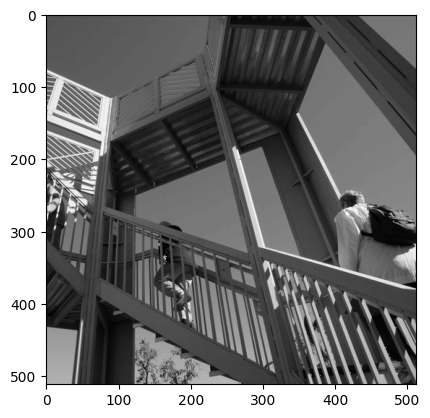

In [2]:
plt.grid(False)
plt.gray()
plt.imshow(i)
plt.show()

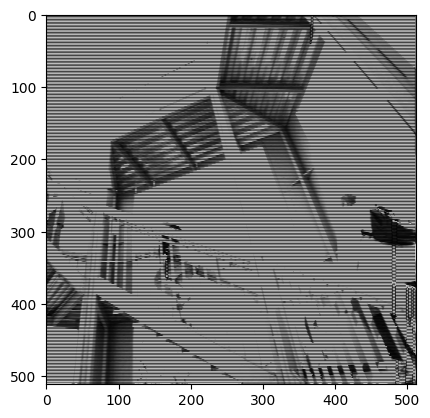

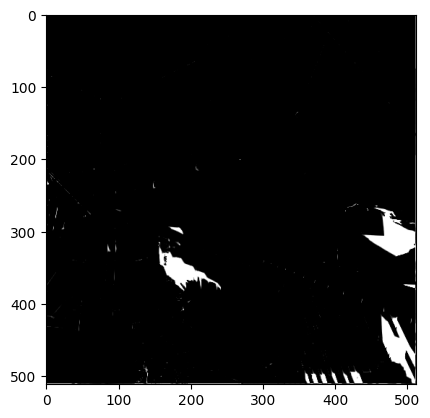

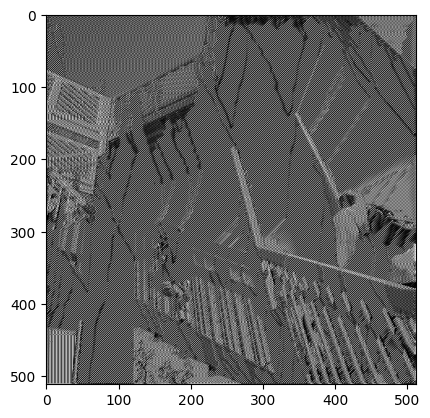

In [5]:
def apply_filter(image, filter, STRIDE = 1):
    i_transformed = np.copy(image)
    size_y = image.shape[0]
    size_x = image.shape[1]
    radius = filter.shape[1] // 2
    for x in range(radius, size_x - radius, STRIDE):
        for y in range(radius, size_y - radius, STRIDE):
            block = i_transformed[x-radius:x+radius+1, y-radius:y+radius+1]
            output = block * filter
            output = output.sum() * (1 / filter.sum())
            if output < 0:
                output = 0
            elif output > 255:
                output = 255
            i_transformed[x, y] = output
    return i_transformed

filter1 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])
filter2 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
filter3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
filters = np.array([filter1, filter2, filter3])

weight = 1
STRIDE = 1

for filter in filters:
    image = apply_filter(np.copy(i), filter, STRIDE)
    plt.gray()
    plt.grid(False)
    plt.imshow(image)
    plt.show()

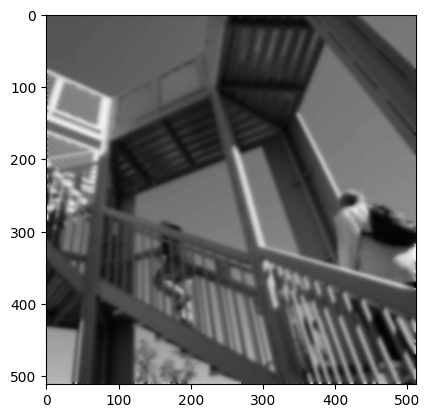

In [6]:
gaussian_filter = np.array([
    [1,  4,  7,  4,  1],
    [4, 16, 26, 16,  4],
    [7, 26, 41, 26,  7],
    [4, 16, 26, 16,  4],
    [1,  4,  7,  4,  1]
])

image = apply_filter(np.copy(i), gaussian_filter, STRIDE=1)
for _ in range(3):
    image = apply_filter(image, gaussian_filter, STRIDE=1)
plt.grid(False)
plt.imshow(image)
plt.show()